In [1]:
import tweepy as tp
import re
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
consumer_key = 'tt6FGjUVqVV4Bga8t2a3rmRR7'
consumer_secret = 'YSZFKghu0qeP1AVgW7u4stwVFWjBw5zNtOOdOGWw1XOs3hUjlP'
access_token = '1288033810722852869-AGEa1bnXoU4YN4BeBEAnhA2bBUNLxG'
access_token_secret = 'bdLQrVlDKDT0eDNGmPMKif22EHm0eGaQRKAnnyaLUizCz'

In [3]:
auth = tp.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tp.API(auth)

In [4]:
topik_1 = 'jouska'
topik_2 = 'anies baswedan'
topik_3 = 'menteri kesehatan'

date_since = '2020-07-27'

In [5]:
ns1 = topik_1 + " -filter:retweets"
ns2 = topik_2 + " -filter:retweets"
ns3 = topik_3 + " -filter:retweets"

In [6]:
tweets_1 = tp.Cursor(api.search, q=ns1, lang="id", since=date_since, tweet_mode="extended").items(1000)
tweets_2 = tp.Cursor(api.search, q=ns2, lang="id", since=date_since, tweet_mode="extended").items(1000)
tweets_3 = tp.Cursor(api.search, q=ns3, lang="id", since=date_since, tweet_mode="extended").items(1000)

In [7]:
items1 = []
items2 = []
items3 = []

for tweet in tweets_1:
    item = []
    item.append (' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet.full_text).split()))
    items1.append(item)
    
for tweet in tweets_2:
    item = []
    item.append (' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet.full_text).split()))
    items2.append(item)
    
for tweet in tweets_3:
    item = []
    item.append (' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet.full_text).split()))
    items3.append(item)

In [8]:
len(items3)

141

In [9]:
pd.options.display.max_colwidth = 300

In [10]:
df1 = pd.DataFrame(data=items1, columns=['tweet'])
df2 = pd.DataFrame(data=items2, columns=['tweet'])
df3 = pd.DataFrame(data=items3, columns=['tweet'])

In [16]:
df1

,tweet
0,KASUS JOUSKA PT Amarta Janus Indonesia Ternyata Awalnya Adalah Perusahaan Konstruksi dan Properti
1,iya emang achievement banget sih Mungkin pengingat untuk diri sendiri biar kalaupun mau show off achievement jangan bikin terlalu hard selling model kayak gitu Atau mas TNP harusnya hire copywriternya kontennya Jouska hahahaha
2,Yuk rame2 report IG Jouska yuk Yang penting IG Jouska take down dulu Kita bantu para korbanjouska dan supaya tidak ada korbanjouska lagi Urusan dibuka lagi pikir ntar aja Mumpung report IGnya gratis Ini permohonan dari salah satu grup korban Thank you
3,Sejauh ini kasus Jouska belum dipolisikan memang sih Polri anggota Satgas Waspada Investasi Aplikasi dan Twitter Jouska masih ada Infografik WaktunyaLokadata
4,Dendam Apa yang Disimpan CNBC terhadap Jouska Tren
...,...
714,Seorang karyawan berusia 28 tahun yang bekerja di PT Djakarta Lloyd Persero meninggal lantaran terinfeksi virus Covid
715,Setuju Value amp brandingnya id ini sangat perfect luar biasa Tau masalah dana darurat investasi dll pun juga dari mereka
716,Gausah repot2 dijelasin bukan urusan kita hidupmu dan keluargmu jalani aja dgn sabar dan tabah Mngkin ini salh satu cara Tuhan mencintai hamba Nya
717,walaupun ternyata jouska begitu tapi karna jouska juga gue melek finansial


In [12]:
pos_list= open("kata_positif.txt","r")
pos_kata = pos_list.readlines()
neg_list= open("kata_negatif.txt","r")
neg_kata = neg_list.readlines()

In [35]:
s1 = []
s2 = []
s3 = []

In [36]:
for item in items1:
    count_p = 0
    count_n = 0
    for kata_pos in pos_kata:
        if kata_pos.strip() in item[0]:
            count_p +=1
    for kata_neg in neg_kata:
        if kata_neg.strip() in item[0]:
            count_n +=1
    s = count_p - count_n
    s1.append(s)
    
for item in items2:
    count_p = 0
    count_n = 0
    for kata_pos in pos_kata:
        if kata_pos.strip() in item[0]:
            count_p +=1
    for kata_neg in neg_kata:
        if kata_neg.strip() in item[0]:
            count_n +=1
    s = count_p - count_n
    s2.append(s)
    
for item in items3:
    count_p = 0
    count_n = 0
    for kata_pos in pos_kata:
        if kata_pos.strip() in item[0]:
            count_p +=1
    for kata_neg in neg_kata:
        if kata_neg.strip() in item[0]:
            count_n +=1
    s = count_p - count_n
    s3.append(s)

In [40]:
df1["sentiment"] = s1
df2["sentiment"] = s2
df3["sentiment"] = s3

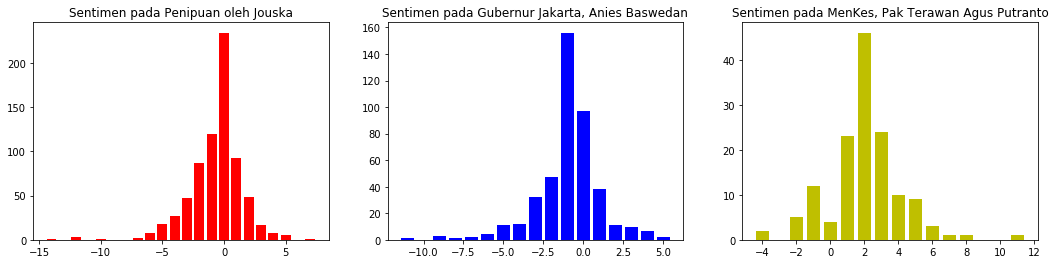

In [76]:
labels1, counts1 = np.unique(df1["sentiment"], return_counts=True)
labels2, counts2 = np.unique(df2["sentiment"], return_counts=True)
labels3, counts3 = np.unique(df3["sentiment"], return_counts=True)

fig, ax = plt.subplots(figsize=(18,4), nrows=1, ncols=3)
ax[0].bar(labels1, counts1, align='center', color='r', label='Penipuan oleh Jouska')
ax[1].bar(labels2, counts2, align='center', color='b', label='Gubernur Jakart, Anies Baswedan')
ax[2].bar(labels3, counts3, align='center', color='y', label='MenKes, Pak Terawan Agus Putranto')
ax[0].set_title('Sentimen pada Penipuan oleh Jouska')
ax[1].set_title('Sentimen pada Gubernur Jakarta, Anies Baswedan')
ax[2].set_title('Sentimen pada MenKes, Pak Terawan Agus Putranto')
plt.show()

In [79]:
print('Sentimen pada Penipuan oleh Jouska')
print('Nilai rata-rata : '+str(np.mean(df1['sentiment'])))
print('Standar deviasi : '+str(np.std(df1['sentiment'])))
print('Kesimpulan      : Sentimen pada mayoritas tweet terhadap penipuan yang dilakukan oleh jouska cenderung negatif')
print('\n')

print('Sentimen pada Gubernur Jakarta, Anies Baswedan')
print('Nilai rata-rata : '+str(np.mean(df2['sentiment'])))
print('Standar deviasi : '+str(np.std(df2['sentiment'])))
print('Kesimpulan      : Sentimen pada mayoritas tweet terhadap Gubernur Jakarta, Anies Baswedan cenderung negatif')
print('\n')

print('Sentimen pada MenKes, Pak Terawan Agus Putranto')
print('Nilai rata-rata : '+str(np.mean(df3['sentiment'])))
print('Standar deviasi : '+str(np.std(df3['sentiment'])))
print('Kesimpulan      : Sentimen pada mayoritas tweet terhadap Menteri Kesehata, Terawan Agus Putranto cenderung positif')
print('\n')

Sentimen pada Penipuan oleh Jouska
Nilai rata-rata : -0.6286509040333796
Standar deviasi : 2.1559020105205406
Kesimpulan      : Sentimen pada mayoritas tweet terhadap penipuan yang dilakukan oleh jouska cenderung negatif


Sentimen pada Gubernur Jakarta, Anies Baswedan
Nilai rata-rata : -0.9331797235023042
Standar deviasi : 1.993689475184093
Kesimpulan      : Sentimen pada mayoritas tweet terhadap Gubernur Jakarta, Anies Baswedan cenderung negatif


Sentimen pada MenKes, Pak Terawan Agus Putranto
Nilai rata-rata : 2.028368794326241
Standar deviasi : 2.120294581471571
Kesimpulan      : Sentimen pada mayoritas tweet terhadap Menteri Kesehata, Terawan Agus Putranto cenderung positif


